# Oddup: Seed Funding by Industry and Market - EDA

### Import libraries

In [638]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

### Import Data to a Dataframe: srcdata

In [639]:
srcdata=pd.read_excel('Seed Funding by Industry & Market.xlsx')

In [640]:
# check for missing data
print(srcdata.isnull().sum()) 


# only 'launchAt' column has 68 missing values but I have replaced nan with default date: 31-12-2999

_id              0
FundingAmount    0
FundingDate      0
FundingType      0
Industry         0
Location         0
launchAt         0
dtype: int64


### Check Data Distribution in Columns

##### Columns:  _id, 	FundingAmount,	FundingDate, 	FundingType,	Industry,	Location,	launchAt

In [643]:
##FundingType

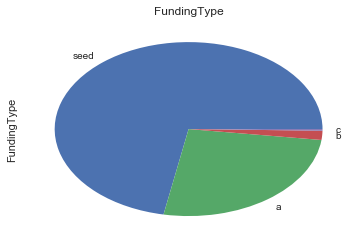

In [644]:
#print(srcdata['FundingType'].value_counts()) 

srcdata['FundingType'].value_counts().plot(kind='pie')
plt.title('FundingType')
# 720 are seed funds, 3 are c funds

# Inference: Maximum funding across all Industries are provided by 'seed' funds and the least by type 'c' funds

In [ ]:
## Industry

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text xticklabel objects>)

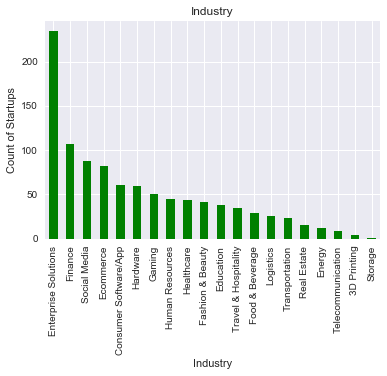

In [648]:
#print(srcdata['Industry'].value_counts()) 

srcdata['Industry'].value_counts().plot(kind='bar',color='g')
plt.title('Industry')
plt.ylabel('Count of Startups')
plt.xlabel('Industry')
plt.xticks(rotation=90)

# Inference: Most companies belong to the Enterprise Solutions industry(234), least from the Real Estate and Storage Industry(1 each)


In [649]:
# Location

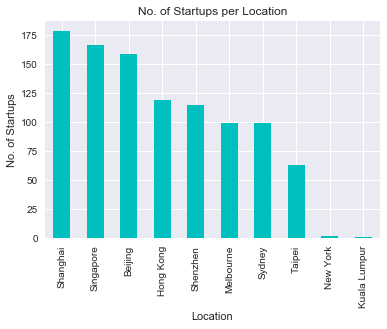

In [650]:
#print(srcdata['Location'].value_counts()) 

srcdata['Location'].value_counts().plot(kind='bar',color='c')
plt.title('No. of Startups per Location')
plt.ylabel('No. of Startups')
plt.xlabel('Location')
#plt.xticks(rotation=0)

# Inference: Shanghai has the most companies(178) and Kuala Lumpur, the least(1)

In [ ]:
# Funding Date

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

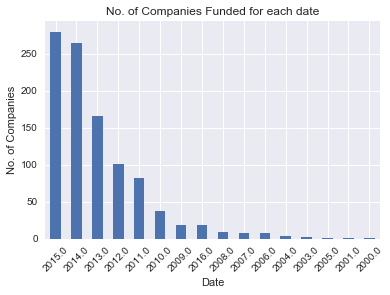

In [654]:
# Process date columns, date is currently in iso-8601 format

from dateutil.parser import parse
import datetime
datetime.datetime.now().date()

def convdate(d):
    return(parse(d))


# process FundingDate

l=0
for i in srcdata['FundingDate']:
    s=convdate(i)
    srcdata.loc[l,'fund_date']=s.date()
    y=s.year
    srcdata.loc[l,'fund_year']=y
    l=l+1

#print(srcdata['fund_year'].value_counts(sort=True))

srcdata['fund_year'].value_counts().plot(kind='bar')
plt.title('No. of Companies Funded for each date')
plt.ylabel('No. of Companies')
plt.xlabel('Date')
plt.xticks(rotation=45)


# Inference: There has been an exponential rise in the number of 'start-up' companies over the last decade and a half. 
# 2015 has seen the highest number of companies being funded

In [655]:
# Launch date

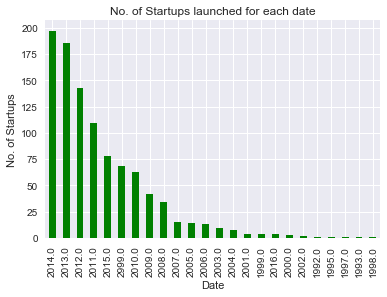

In [657]:
def convdate(d):
    return(parse(d))

# process LaunchAt, date is currently in iso-8601 format

l=0
for i in srcdata['launchAt']:
    i=str(i)
    s=convdate(i)
    srcdata.loc[l,'launch_date']=s.date()
    y=s.year
    srcdata.loc[l,'launch_year']=y
    l=l+1
    

srcdata['launch_year'].value_counts().plot(kind='bar',color='g')
plt.title('No. of Startups launched for each date')
plt.ylabel('No. of Startups')
plt.xlabel('Date')

# Inference: Number of companies launched has also exponentially risen from 1998 to 2014; the Highest number being in 2014


# Further EDA

### Has time influenced the type of funding?

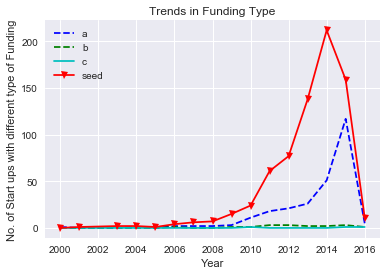

In [660]:
#preparation for multi-line plots
l=pd.crosstab(srcdata.fund_year,srcdata.FundingType,margins=True)
l=pd.DataFrame(l,columns = ["year", "a", "b", "c","seed"])
l=l.drop('year',axis=1)
l=l.drop(l.index[-1:])

#prepare x axis
x=set(srcdata['fund_year'])
x=list(x)
x.sort()

fig=plt.figure()
ax=fig.add_subplot(111)
 
ax.plot(x,l['a'],c='b',marker="^",ls='--',label='a',fillstyle='none')
ax.plot(x,l['b'],c='g',marker=(8,2,0),ls='--',label='b')
ax.plot(x, l['c'],c='c',ls='-',label='c')
ax.plot(x,l['seed'],c='r',marker="v",ls='-',label='seed')
plt.xlabel('Year')
plt.ylabel('No. of Start ups with different type of Funding')
plt.title('Trends in Funding Type')
plt.legend(loc=2)
plt.show()

# Inference: All types of funding show similar trend of rise and fall with time. 
# A maximum number of companies were 'seed' funded at 2014 and the number has plunged ever since
# 'a' type funding reached its peak in 2015 and the number of such companies seems to have fallen since

### Trend of Funding Amount with Time

   fund_year FundingAmount
                       sum
0     2000.0        800000
1     2001.0        750000
2     2003.0        700000
3     2004.0      15150000
4     2005.0       2310000
5     2006.0       9663700
6     2007.0      21142000
7     2008.0      12260000
8     2009.0      28690000
9     2010.0     120981388
10    2011.0     263092224
11    2012.0     190732873
12    2013.0     148729774
13    2014.0     595555286
14    2015.0     906302596
15    2016.0     117810625


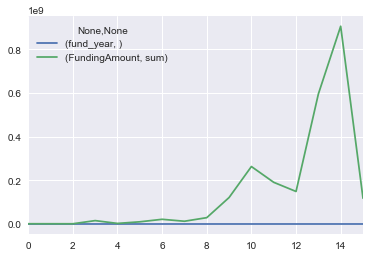

In [693]:
t=srcdata.groupby(['fund_year'],as_index=False).agg({'FundingAmount':['sum']})
print(t)
t.plot()

# Inference: we observe a rising and falling trend over the last few years, lot of funding seen in 2011 but a drop in the same is
## observed in the year 2013. Similarly, a much higher amount of funding witnessed in 2014 plummets in the following years: 2015,2016


### Closely observe the companies funded in 2014 and 2015

In [696]:
# What happened in 2014

x=srcdata.loc[srcdata['fund_year'] == 2014 ]
x2014=pd.crosstab(x['fund_year'],x['launch_year'])
print(x2014)

# Inference: Most companies funded in 2014(94) were also launched in 2014 or earlier, very few launched the next year. Thats why the 
# fall in funding amount seen in 2015/2016

launch_year  1998.0  1999.0  2002.0  2003.0  2005.0  2006.0  2008.0  2009.0  \
fund_year                                                                     
2014.0            1       1       1       3       2       2       5       3   

launch_year  2010.0  2011.0  2012.0  2013.0  2014.0  2015.0  2016.0  2999.0  
fund_year                                                                    
2014.0            6      14      37      69      93       9       2      17  


In [701]:
# What happened in 2011

x=srcdata.loc[srcdata['fund_year'] == 2011 ]
x2011=pd.crosstab(x['fund_year'],x['launch_year'])
print(x2011)

# Inference: Although fewer in number, most of the companies(34) funded in 2011 were also launched in 2011 or earlier, 
#very few launched the next year. Thats why the fall in funding amount seen in 2012/2013


launch_year  1999.0  2000.0  2003.0  2004.0  2005.0  2006.0  2007.0  2008.0  \
fund_year                                                                     
2011.0            1       1       2       1       2       2       1       6   

launch_year  2009.0  2010.0  2011.0  2012.0  2014.0  2999.0  
fund_year                                                    
2011.0            6      14      34       3       1       8  


### What type of funding and how much of it goes into each Industry?


                Industry          a         b         c       seed
0             3DPrinting          0         0         0    1064000
1   ConsumerSoftware/App   22301668   8709677         0   19686064
2              Ecommerce  158254487  25000000  30959752   40114338
3              Education   27584000         0         0   87293716
4                 Energy    2200000         0         0    1979412
5    EnterpriseSolutions  509993214  82550000  60000000  125968283
6         Fashion&Beauty   46207244         0         0   14621858
7                Finance  212099470  11700000         0   55584315
8          Food&Beverage   50745628         0  15000000   27397060
9                 Gaming   69269699         0         0   14317785
10              Hardware   58614174   5000000         0   24006524
11            Healthcare   90427000         0         0   24423549
12        HumanResources   23525000   5000000         0   17702005
13             Logistics   37600000         0         0   2070

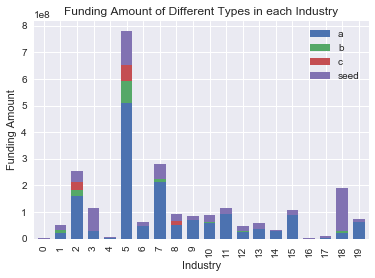

In [702]:

df=srcdata.groupby(['Industry', 'FundingType'],as_index=False).agg({'FundingAmount':['sum']})
#print(df)
seed=[1064000,19686064,40114338,87293716,1979412,125968283,14621858,55584315,27397060,14317785,24006524,24423549,17702005,20705000,3995817,18726250,500000,5070000,160384210,11253267]
a=[0,22301668,158254487,27584000,2200000,509993214,46207244,212099470,50745628,69269699,58614174,90427000,23525000,37600000,27000000,88343000,0,3500000,21193000,60656000]
b=[0,8709677,25000000,0,0,82550000,0,11700000,0,0,5000000,0,5000000,0,0,0,0,0,6444000,0]
c= [0,0,30959752,0,0,60000000,0,0,15000000,0,0,0,0,0,0,0,0,0,0,0]
x= ['3DPrinting','ConsumerSoftware/App','Ecommerce','Education','Energy','EnterpriseSolutions','Fashion&Beauty','Finance','Food&Beverage','Gaming','Hardware','Healthcare','HumanResources','Logistics','RealEstate','SocialMedia','Storage','Telecommunication','Transportation','Travel&Hospitality']

df = pd.DataFrame({'seed': seed,
                   'a': a,
                   'b': b,
                  'c': c,'Industry':x})
#df.set_index('Industry')
df.plot(kind='bar',stacked=True,title="Funding Amount of Different Types in each Industry",width=0.7)
print(df)
#plt.axis(x)
plt.legend()
plt.xlabel("Industry")
plt.ylabel("Funding Amount")
plt.show()



In [705]:
# Inference1: Transportation industry has more 'seed' funds than any other type just like the Education industry
## Enterprise solutions industry has the highest funding amount because it also has the highest number of companies. 
## But most of its funding comes from type 'a' funds, similar thing can be said about most other industries except 'Education' 
## and 'Transportation' industry

# Inference2: Ecommerce and Enterprise Solutions industries see all 4 types of funding
# Real Estate and storage have least seed funding

### Is funding type a characteristic of a particular location?

        Location FundingType FundingAmount                    
                                       sum          mean count
0        Beijing           a     336479095  4.313835e+06    78
1        Beijing           b      54709677  1.823656e+07     3
2        Beijing           c      45959752  2.297988e+07     2
3        Beijing        seed     269254223  3.590056e+06    75
4      Hong Kong           a      82300000  7.481818e+06    11
5      Hong Kong        seed      67760461  6.274117e+05   108
6   Kuala Lumpur        seed        800000  8.000000e+05     1
7      Melbourne           a      52588000  7.512571e+06     7
8      Melbourne           b       4000000  4.000000e+06     1
9      Melbourne        seed      64665049  7.106049e+05    91
10      New York           a       2000000  2.000000e+06     1
11      New York        seed       2500000  2.500000e+06     1
12      Shanghai           a     472187828  4.721878e+06   100
13      Shanghai           b      56594000  7.074250e+0

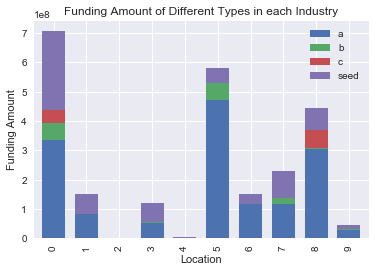

In [742]:
df=srcdata.groupby(['Location', 'FundingType'],as_index=False).agg({'FundingAmount':['sum','mean','count']})
a=[336479095,82300000,0,52588000,2000000,472187828,118032114,116258370,303168177,26500000]
b=[54709677,0,0,4000000,0,56594000,0,19900000,4200000,5000000]
c=[45959752,0,0,0,0,0,0,0,60000000,0]
seed=[269254223,67760461,800000,64665049,2500000,51325136,33976675,92971658,78135251,13405000]
x=['Beijing','   Hong Kong','Kuala Lumpur','Melbourne','New York','Shanghai','Shenzhen','Singapore','Sydney','Taipei']
print(df)

df = pd.DataFrame({'seed': seed,
                   'a': a,
                   'b': b,
                  'c': c,'Location':x})

df.plot(kind='bar',stacked=True,title="Funding Amount of Different Types in each Industry",width=0.7)

plt.legend()
plt.xlabel("Location")
plt.ylabel("Funding Amount")
plt.show()

# Inference: Irrespective of Location and Industry, Companies receive highest funding of type 'a'. 
##  Beijing also sees the highest amount of seed funding, although it doesn't have the highest number of companies

### Average Funding Amount per Company in each Industry

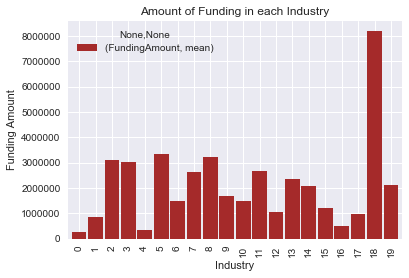

In [743]:
famount=srcdata.groupby(['Industry'],as_index=False).agg({'FundingAmount':['mean']})

famount.plot(kind='bar',width=0.9,color='brown')
plt.title('Amount of Funding in each Industry')
plt.ylabel('Funding Amount')
plt.xlabel('Industry')
#print(famount)

# Inference: Transportation industry has the greatest average funding per company

### Assume that Companies for which launchAt is blank, were all not-launched

#### How many Companies were funded but not launched? 
#### Which Industry/ Location did they belong to?
#### What was the range of funding amount?


In [748]:
#dataframe l has all startups that were funded but not launched
l=srcdata[srcdata['launch_year']==2999]
print(l.shape)

#l['Industry'].value_counts()
# 68 companies have no 'launchAt' or launch date, here we assume they remain unlaunched

(68, 11)


In [749]:
Not_launched=l['Industry'].value_counts()
total_number=srcdata['Industry'].value_counts()
#print(total_number)

pct_fail=(Not_launched/total_number)*100
pct_fail=pct_fail.dropna()
print(pct_fail)

# Inference: Although the 3D printing and Storage industries seem to exhibit high pecentages of failure to launch companies, 
## we must  note that they are very few companies in those Industries
## The Gaming industries seems to have the least failures

3D Printing               50.000000
Consumer Software/App      9.836066
Ecommerce                  3.658537
Education                 10.526316
Enterprise Solutions       7.692308
Fashion & Beauty           2.439024
Finance                    7.476636
Gaming                     2.000000
Hardware                   3.389831
Healthcare                 9.302326
Logistics                  4.000000
Real Estate               26.666667
Social Media              10.227273
Storage                  100.000000
Telecommunication         11.111111
Travel & Hospitality       8.823529
Name: Industry, dtype: float64


In [750]:
Not_launched_loc=l['Location'].value_counts()
total_number_loc=srcdata['Location'].value_counts()

pct_fail=(Not_launched_loc/total_number_loc)*100
pct_fail=pct_fail.dropna()
print(pct_fail)
#print(Not_launched_loc)
#print(total_number_loc)
#print(l['Location'].value_counts())

# Inferenece: even though NY has the highest pct of funded companies that have not been launched, the total number  of companies in NY is just 2
## Shanghai has the highest total number of companies but just 3% failure to launch
## Singapore and Shenzhen see a higher number of companies yet to be launched in spite of being funded

Beijing       3.797468
Hong Kong     8.403361
New York     50.000000
Shanghai      3.370787
Shenzhen     13.043478
Singapore    12.048193
Taipei       15.873016
Name: Location, dtype: float64


In [752]:
#Range of Funding for such start ups: very low, low, average, high
srcdata['Fundingrange']=pd.qcut(srcdata.FundingAmount,4,labels=["very low","low","average","high"])
#print(srcdata['Fundingrange'].value_counts(dropna=False))
#print(' ')
#print(' ')
notlaunched=srcdata[srcdata['launch_year']==2999]
print(notlaunched['Fundingrange'].value_counts(dropna=False))
#print(' ')
#print(' ')

# Inferenece: Only 7 of the 68 companies not launched had high funding given to them.
## Most of those which failed to launch were given average to very low funding

very low    27
low         20
average     14
high         7
Name: Fundingrange, dtype: int64


### When are Companies Launched and Funded?

In [772]:
dates=pd.DataFrame({'fund_date': srcdata['fund_date'],
                   'launch_date': srcdata['launch_date'],
                  'gap_days': srcdata['launch_date']-srcdata['fund_date'],
                   'launch_year':srcdata['launch_year'],
                    'Fundingrange':srcdata['Fundingrange'],
                    'FundingType':srcdata['FundingType']})

launched=dates[dates['launch_year']!=2999]

g=launched[launched['gap_days']>'0']
y=g[g['Fundingrange']=="high"] 

print(y)

# Gap days - Gap between funding date and Launch date

l=launched[launched['gap_days']<'0']
l_gap=l['gap_days']

print(l_gap.describe())
   

# Inference: Most companies are funded post launch,  113 of 1000 companies were launched after funding
## most other companies are launched first and funded later on
## of these 113 companies, only 8 of 'highly' funded companies were launched after their funding dates
## There are companies that where launched thousands of days after they were funded. Maximum gap observed was 8286 days.
## On the other hand we can also witness companies that were launched the next day after funding                      


count                           723
mean     -723 days +22:34:21.410788
std        972 days 04:19:07.987803
min            -8286 days +00:00:00
25%             -854 days +12:00:00
50%             -402 days +00:00:00
75%             -164 days +12:00:00
max               -1 days +00:00:00
Name: gap_days, dtype: object


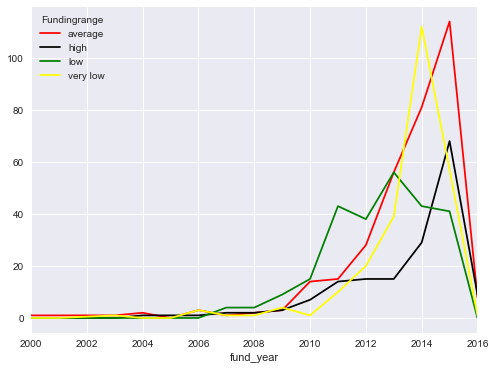

In [797]:
# Ranges of funding amounts over the years

dates=pd.DataFrame({'fund_year': srcdata['fund_year'],
                    'Fundingrange':srcdata['Fundingrange']})

x=pd.crosstab(dates['fund_year'],dates['Fundingrange'])
x.plot(color=['red','black','green','yellow'],figsize=(8,6))

# Inference: While most companies could get average to very low funding, we can observe a surge in 'high' funding amounts for
## companies right from the years 2014 to 2015. However, funding across all ranges(very low, low, average, high) seems to dip 
## towards 2016


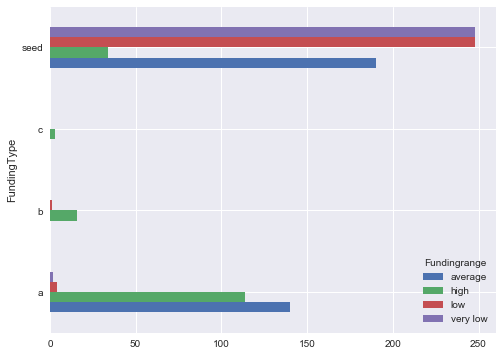

In [803]:
# Ranges of funding amounts over the years

dates=pd.DataFrame({'FundingType': srcdata['FundingType'],
                    'Fundingrange':srcdata['Fundingrange']})

x=pd.crosstab(dates['FundingType'],dates['Fundingrange'])
x.plot(kind='barh',figsize=(8,6))

# Inference: Type 'a' funds are the highest amount amongst the 4 different Funding Types: a,b,c,seed


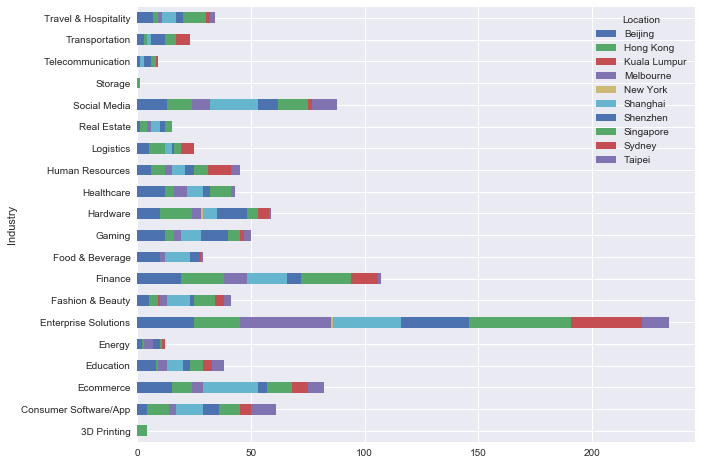

In [796]:
# Location vs Industry
x=pd.crosstab(srcdata['Industry'],srcdata['Location'])
x.plot(kind='barh',stacked=True, figsize=(10,8))


# Inference: The Width of each stack is dictated by the number of companies in each industry in every Location
# Beijing,shenzen,singapore, taipei have companies of every industry except storage and 3d printing
# Highest number of companies belong to the Enterprise Solutions industry and they are distributed in Kuala Lumpur, Taipei, Hong Kong,
##  Beijing, Shenzen, Shanghai and Melbourne

### Correlated Variables

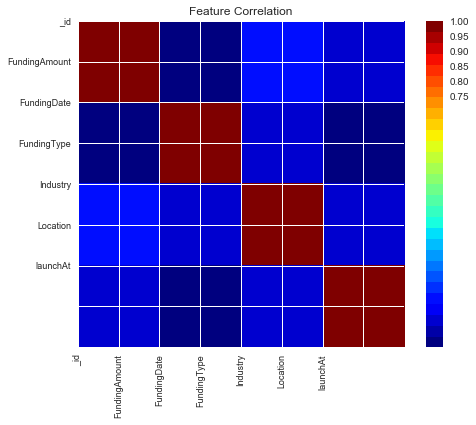

In [552]:
def correlation_matrix(df):

    from matplotlib import cm as cm

    fig = plt.figure(figsize=(8,6))
    ax1 = fig.add_subplot(111)
    cmap = cm.get_cmap('jet', 30)
    cax = ax1.imshow(df.corr(), interpolation="nearest", cmap=cmap)
    ax1.grid(True)
    plt.title('Feature Correlation')
    labels=['_id','FundingAmount','FundingDate','FundingType','Industry','Location','launchAt']
    ax1.set_xticklabels(labels,fontsize=9)
    plt.xticks(rotation=90)
    ax1.set_yticklabels(labels,fontsize=9)
    # Add colorbar, make sure to specify tick locations to match desired ticklabels
    fig.colorbar(cax, ticks=[.75,.8,.85,.90,.95,1])
    plt.show(block=True)

correlation_matrix(srcdata)


# Inference: The heatmap below allows us to infer that none of the variables in our data set are correlated with each other